<a href="https://colab.research.google.com/github/Masesee/Churn-Model/blob/main/Churn_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Import


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive, files
drive.mount('/content/drive')

import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

columns_to_drop = [
    'T24_CUST_ID','T24_CUST_NAME','T24_CUST_IDTYPE', 'T24_CUST_IDNO', 'CUS_DATE_OF_BIRTH', 'MAIN_CONTACT', 'T24_CUST_EMAIL','T24_CUST_STREET', 'T24_CUST_ADDRESS', 'T24_CUST_POSTAL_ADDRESS',
    'CONVENTIONAL_LOAN_REMARKS_2023','CONVENTIONAL_LOAN_REMARKS_2022','DIGITAL_LOAN_REMARKS_2023','DIGITAL_LOAN_REMARKS_2022',
    'TERM_DEPOSITS_REMARKS_2023','TERM_DEPOSITS_REMARKS_2022','ACTIVE_ACCOUNTS_REMARKS', 'CASA_DEPOSITS_CURRENT_REMARKS',
    'FL_LOAN_REMARKS', 'FL_TERMDEPOSIT_REMARKS', 'FL_CASADEPOSIT_REMARKS', 'FL_FINAL_FLAG_REMARKS', 'MOBILE_PAYMENT_AMOUNT_2022_REMARKS',
    'MOBILE_PAYMENT_AMOUNT_2023_REMARKS', 'IB_PAYMENT_AMOUNT_2022_REMARKS', 'IB_PAYMENT_AMOUNT_2023_REMARKS'
                   ]

df = pd.read_csv('/content/drive/My Drive/DS_DA KCB/Churn Analysis/Prediction Model/Data/Churn Modelling Data.csv', encoding='latin-1', low_memory=False, usecols=lambda column: column not in columns_to_drop) # or 'ISO-8859-1', 'cp1252'
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CUS_GENDER,T24_CUST_SECTOR,T24_CUST_INDUSTRY,KCB_CUS_CVP,KCB_SECTOR,CUS_BANK_ID,KCB_CUS_SEGMENT,BRANCH_CODE,AGE,CONVENTIONAL_LOAN_BALANCE_2023,...,MOBILE_PAYMENT_AMOUNT_2023,MOBILE_PAYMENT_TRX_COUNT_2023,HAS_MOBILE_TXN_2023,IB_PAYMENT_AMOUNT_2022,IB_PAYMENT_TRX_COUNT_2022,HAS_IB_TXN_2022,IB_PAYMENT_AMOUNT_2023,IB_PAYMENT_TRX_COUNT_2023,HAS_IB_TXN_2023,FLAG
0,OTHER,3100,2410,NaN,1020,UG0010022,8350,4650,9.0,NaN,...,NaN,NaN,0,100000.0,1.0,1,57392000.0,9.0,1,0
1,OTHER,4603,6500,NaN,1020,UG0010022,8350,4651,25.0,NaN,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,0
2,FEMALE,1001,1000,NaN,1001,UG0010022,8100,4662,8.0,NaN,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,0
3,FEMALE,1001,2350,NaN,1001,UG0010022,8100,4659,36.0,NaN,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,0
4,FEMALE,1001,1900,NaN,1001,UG0010022,8100,4657,37.0,NaN,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,1


In [ ]:
# columns_to_drop = [
#     'T24_CUST_NAME','T24_CUST_IDTYPE', 'T24_CUST_IDNO', 'CUS_DATE_OF_BIRTH', 'MAIN_CONTACT', 'T24_CUST_EMAIL','T24_CUST_STREET', 'T24_CUST_ADDRESS', 'T24_CUST_POSTAL_ADDRESS',
#     'CONVENTIONAL_LOAN_REMARKS_2023','CONVENTIONAL_LOAN_REMARKS_2022','DIGITAL_LOAN_REMARKS_2023','DIGITAL_LOAN_REMARKS_2022',
#     'TERM_DEPOSITS_REMARKS_2023','TERM_DEPOSITS_REMARKS_2022','ACTIVE_ACCOUNTS_REMARKS', 'CASA_DEPOSITS_CURRENT_REMARKS',
#     'FL_LOAN_REMARKS', 'FL_TERMDEPOSIT_REMARKS', 'FL_CASADEPOSIT_REMARKS', 'FL_FINAL_FLAG_REMARKS', 'MOBILE_PAYMENT_AMOUNT_2022_REMARKS',
#     'MOBILE_PAYMENT_AMOUNT_2023_REMARKS', 'IB_PAYMENT_AMOUNT_2022_REMARKS', 'IB_PAYMENT_AMOUNT_2023_REMARKS'
#                    ]

# df = pd.read_csv('/content/drive/My Drive/DS_DA KCB/Churn Analysis/Prediction Model/Data/Churn Modelling Data.csv', encoding='latin-1', low_memory=False, usecols=lambda column: column not in columns_to_drop) # or 'ISO-8859-1', 'cp1252'
# df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33787 entries, 0 to 33786
Data columns (total 72 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CUS_GENDER                         33761 non-null  object 
 1   T24_CUST_SECTOR                    33787 non-null  int64  
 2   T24_CUST_INDUSTRY                  33787 non-null  int64  
 3   KCB_CUS_CVP                        0 non-null      float64
 4   KCB_SECTOR                         33787 non-null  int64  
 5   CUS_BANK_ID                        33787 non-null  object 
 6   KCB_CUS_SEGMENT                    33787 non-null  int64  
 7   BRANCH_CODE                        33787 non-null  int64  
 8   AGE                                33666 non-null  float64
 9   CONVENTIONAL_LOAN_BALANCE_2023     2065 non-null   float64
 10  CONVENTIONAL_LOAN_BALANCE_2022     1656 non-null   float64
 11  DIGITAL_LOAN_BALANCE_2023          1381 non-null   flo

# Preparatory steps before training


## Tackling the non numeric dtypes
*   Replacing *ACTIVE_ACCOUNTS* with *ACTIVE_ACCOUNT_COUNT*
*   Transforming the date features to *datetime* dtype
*   Encode categorical features







In [ ]:
for column in df.columns:
    if not pd.api.types.is_numeric_dtype(df[column]):
        print(column) # Indent this line to be part of the 'if' block

CUS_GENDER
CUS_BANK_ID
ACTIVE_ACCOUNTS
VL_TURNOVER_2021_MAX_DATE
VL_TURNOVER_2022_MAX_DATE
VL_TURNOVER_2023_MAX_DATE
OLDEST_ACCOUNT
FL_TURNOVER_REMARKS
COMPUTED_CVP_DESC
DORMANT_ACCOUNT_REMARKS


In [ ]:
df[['CUS_GENDER','ACTIVE_ACCOUNTS','VL_TURNOVER_2021_MAX_DATE','VL_TURNOVER_2022_MAX_DATE','VL_TURNOVER_2023_MAX_DATE',
    'OLDEST_ACCOUNT','FL_TURNOVER_REMARKS','COMPUTED_CVP_DESC']]

,CUS_GENDER,ACTIVE_ACCOUNTS,VL_TURNOVER_2021_MAX_DATE,VL_TURNOVER_2022_MAX_DATE,VL_TURNOVER_2023_MAX_DATE,OLDEST_ACCOUNT,FL_TURNOVER_REMARKS,COMPUTED_CVP_DESC
0,OTHER,2203087412,17-SEP-21,30-DEC-22,08-NOV-23,22-FEB-16,SMALL : >=_15000000 AND < _300000000,SMALL
1,OTHER,NaN,NaN,30-NOV-22,NaN,11-FEB-22,SMALL : >=_15000000 AND < _300000000,SMALL
2,FEMALE,NaN,NaN,24-SEP-22,NaN,22-SEP-22,NaN,MASS
3,FEMALE,2317592205,NaN,NaN,07-DEC-23,01-AUG-23,NaN,MASS
4,FEMALE,NaN,NaN,NaN,06-DEC-23,06-DEC-23,NaN,MASS
...,...,...,...,...,...,...,...,...
33782,MALE,"2202893857,2290903531",22-DEC-21,28-DEC-22,21-DEC-23,26-NOV-15,AVERAGE_OF_2021_AND_2022_IS_>=_900000,AFFLUENT
33783,MALE,"2201634807,2202549862",31-DEC-21,30-DEC-22,29-DEC-23,13-FEB-13,AVERAGE_OF_2021_AND_2022_IS_>=_900000,AFFLUENT
33784,OTHER,"2314654803,2314701674",NaN,NaN,29-DEC-23,11-APR-23,Medium C : >=_9000000000,Medium C
33785,OTHER,"2201803986,2291625012",24-DEC-21,22-DEC-22,28-DEC-23,31-JUL-13,SMALL : >=_15000000 AND < _300000000,SMALL


In [ ]:
# Create a new column 'ACTIVE_ACCOUNT_COUNT' to count active accounts if they are listed
df['ACTIVE_ACCOUNT_COUNT'] = df['ACTIVE_ACCOUNTS'].apply(
    lambda x: len(str(x).split(',')) if pd.notna(x) else 0
)

# Drop the original 'ACTIVE_ACCOUNTS' column
df = df.drop('ACTIVE_ACCOUNTS', axis=1)

In [ ]:
# Converting date columns to datetime format
date_cols = ['VL_TURNOVER_2021_MAX_DATE', 'VL_TURNOVER_2022_MAX_DATE',
             'VL_TURNOVER_2023_MAX_DATE', 'OLDEST_ACCOUNT']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%d-%b-%y', errors='coerce')

In [ ]:
# Encode the CUS_GENDER Column and drop it
column_to_encode = ['CUS_GENDER']
df = pd.get_dummies(df, columns=column_to_encode, drop_first=False)
#  Drop the original 'CUS_GENDER' column
# df = df.drop('CUS_GENDER', axis=1)

In [ ]:
df[['CUS_GENDER_FEMALE', 'CUS_GENDER_MALE', 'CUS_GENDER_OTHER']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33787 entries, 0 to 33786
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CUS_GENDER_FEMALE  33787 non-null  bool 
 1   CUS_GENDER_MALE    33787 non-null  bool 
 2   CUS_GENDER_OTHER   33787 non-null  bool 
dtypes: bool(3)
memory usage: 99.1 KB


In [ ]:
# change the bool dtype in rows 'CUS_GENDER_FEMALE', 'CUS_GENDER_MALE', 'CUS_GENDER_OTHER' to integers

for column in ['CUS_GENDER_FEMALE', 'CUS_GENDER_MALE', 'CUS_GENDER_OTHER']:
  df[column] = df[column].astype(int)

df[['CUS_GENDER_FEMALE', 'CUS_GENDER_MALE', 'CUS_GENDER_OTHER']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33787 entries, 0 to 33786
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CUS_GENDER_FEMALE  33787 non-null  int64
 1   CUS_GENDER_MALE    33787 non-null  int64
 2   CUS_GENDER_OTHER   33787 non-null  int64
dtypes: int64(3)
memory usage: 792.0 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'FL_TURNOVER_REMARKS' column
# Initialize the label encoder
le = LabelEncoder()

# Encode the 'FL_TURNOVER_REMARKS' column
df['FL_TURNOVER_REMARKS'] = le.fit_transform(df['FL_TURNOVER_REMARKS'])

# Create a dictionary that maps encoded values back to original categories
fl_turnover_remarks_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the encoding key
print(fl_turnover_remarks_mapping)


{'AVERAGE_OF_2021_AND_2022_IS_>=_3000000': 0, 'AVERAGE_OF_2021_AND_2022_IS_>=_30000000': 1, 'AVERAGE_OF_2021_AND_2022_IS_>=_900000': 2, 'AVERAGE_OF_2021_PLUS_2022_IS_>=_1500000': 3, 'AVERAGE_OF_2022_AND_2023_IS_>=_300000': 4, 'AVERAGE_OF_2022_AND_2023_IS_>=_3000000': 5, 'AVERAGE_OF_2022_AND_2023_IS_>=_30000000': 6, 'AVERAGE_OF_2022_PLUS_2023_IS_>=_1500000': 7, 'Medium A : >=_300000000 AND < _1500000000': 8, 'Medium B : >=_1500000000 AND < _9000000000': 9, 'Medium C : >=_9000000000': 10, 'SMALL : >=_15000000 AND < _300000000': 11, nan: 12}


In [ ]:
# Encode the 'COMPUTED_CVP_DESC' column
# Initialize the label encoder
le = LabelEncoder()

# Encode the 'COMPUTED_CVP_DESC' column
df['COMPUTED_CVP_DESC'] = le.fit_transform(df['COMPUTED_CVP_DESC'])

# Create a dictionary that maps encoded values back to original categories
computed_cvp_desc_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the encoding key
print(computed_cvp_desc_mapping)


{'AFFLUENT': 0, 'HNW': 1, 'MASS': 2, 'MICRO': 3, 'MID.AFFLUENT': 4, 'MID.CORE': 5, 'Medium A': 6, 'Medium B': 7, 'Medium C': 8, 'SMALL': 9, nan: 10}


In [ ]:
# Checking on the account flags
account_features = [
    'HAS_ACCOUNT', 'HAS_ACTIVE_CONVENTIONAL_ACCOUNT', 'HAS_ACTIVE_DIGITAL_ACCOUNT',
    'HAS_CURRENT_ACCOUNT', 'HAS_TRANSACTIONAL_ACCOUNT', 'HAS_SAVINGS_ACCOUNT'
]
df[account_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33787 entries, 0 to 33786
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HAS_ACCOUNT                      33549 non-null  float64
 1   HAS_ACTIVE_CONVENTIONAL_ACCOUNT  26066 non-null  float64
 2   HAS_ACTIVE_DIGITAL_ACCOUNT       1 non-null      float64
 3   HAS_CURRENT_ACCOUNT              7502 non-null   float64
 4   HAS_TRANSACTIONAL_ACCOUNT        21900 non-null  float64
 5   HAS_SAVINGS_ACCOUNT              5741 non-null   float64
dtypes: float64(6)
memory usage: 1.5 MB


## Checking null values/percentage of null values and unique values in a column



In [ ]:
# Percentage of null values

null_percentage = df.isnull().sum() * 100 / len(df)
null_percentage = null_percentage[null_percentage > 0].sort_values(ascending=False)
null_percentage

,0
KCB_CUS_CVP,100.000000
CREDIT_CARD_TRANZWARE_CLIENT_ID,100.000000
CREDIT_CARD_LAST_TRANSACTION_DATE,100.000000
CREDIT_CARD_TYPE,100.000000
CREDIT_CARD_REMARKS,100.000000
HAS_ACTIVE_DIGITAL_ACCOUNT,99.997040
TERM_DEPOSITS_2022,99.632995
TERM_DEPOSITS_2023,99.591559
FL_TERMDEPOSIT,99.464291
FL_LOAN,98.721402


In [ ]:
# drop all the columns with percentages of null values of gretaer than 70%

# Calculate the percentage of null values for each column
null_percentage = df.isnull().sum() * 100 / len(df)

# Identify columns with more than 70% null values
columns_to_drop = null_percentage[null_percentage > 70].index.tolist()

# Drop the identified columns
df = df.drop(columns=columns_to_drop)

In [ ]:
df.columns

Index(['T24_CUST_SECTOR', 'T24_CUST_INDUSTRY', 'KCB_SECTOR', 'CUS_BANK_ID',
       'KCB_CUS_SEGMENT', 'BRANCH_CODE', 'AGE', 'HAS_ACCOUNT',
       'HAS_ACTIVE_CONVENTIONAL_ACCOUNT', 'HAS_TRANSACTIONAL_ACCOUNT',
       'VL_TURNOVER_2021', 'VL_TURNOVER_2021_MAX_DATE', 'VL_TURNOVER_2022',
       'VL_TURNOVER_2022_MAX_DATE', 'NO_TRXNS_2023', 'VL_TURNOVER_2023',
       'VL_TURNOVER_2023_MAX_DATE', 'OLDEST_ACCOUNT', 'CASA_DEPOSITS_CURRENT',
       'FL_TURNOVER_REMARKS', 'AVG_MONTHLY_TURNOVER_2021',
       'AVG_MONTHLY_TURNOVER_2022', 'AVG_MONTHLY_TURNOVER_2023',
       'FL_FINAL_FLAG', 'COMPUTED_CVP', 'COMPUTED_CVP_DESC', 'AGENT_TXNS',
       'AGENT_TXN_AMOUNT', 'AGENT_HAS_TXNS', 'ATM_TXNS', 'ATM_TXN_AMOUNT',
       'ATM_HAS_TXNS', 'POS_TXNS', 'POS_TXN_AMOUNT', 'POS_HAS_TXNS',
       'HAS_DORMANT_ACCOUNT', 'CREDIT_CARD_FL', 'CREDIT_CARD_LIMIT',
       'HAS_MOBILE_TXN_2022', 'MOBILE_PAYMENT_AMOUNT_2023',
       'MOBILE_PAYMENT_TRX_COUNT_2023', 'HAS_MOBILE_TXN_2023',
       'HAS_IB_TXN_2022', '

Check for unique values

In [ ]:
# Calculate the number of unique values for each column and sort the results
unique_value_counts = df.nunique().sort_values(ascending=False)

unique_value_counts

,0
CASA_DEPOSITS_CURRENT,26176
AVG_MONTHLY_TURNOVER_2023,18813
VL_TURNOVER_2023,18813
AVG_MONTHLY_TURNOVER_2022,15181
VL_TURNOVER_2022,15181
AVG_MONTHLY_TURNOVER_2021,11905
VL_TURNOVER_2021,11905
MOBILE_PAYMENT_AMOUNT_2023,8421
ATM_TXN_AMOUNT,5469
OLDEST_ACCOUNT,4412


In [ ]:
# drop specific columns with only 1 unique value
columns_one_unique = ['CREDIT_CARD_LIMIT','CUS_BANK_ID','CREDIT_CARD_FL']

# Drop the identified columns
df = df.drop(columns=columns_one_unique)

Dealing with the remaining columns that have null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33787 entries, 0 to 33786
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   T24_CUST_SECTOR                  33787 non-null  int64         
 1   T24_CUST_INDUSTRY                33787 non-null  int64         
 2   KCB_SECTOR                       33787 non-null  int64         
 3   KCB_CUS_SEGMENT                  33787 non-null  int64         
 4   BRANCH_CODE                      33787 non-null  int64         
 5   AGE                              33666 non-null  float64       
 6   HAS_ACCOUNT                      33549 non-null  float64       
 7   HAS_ACTIVE_CONVENTIONAL_ACCOUNT  26066 non-null  float64       
 8   HAS_TRANSACTIONAL_ACCOUNT        21900 non-null  float64       
 9   VL_TURNOVER_2021                 16976 non-null  float64       
 10  VL_TURNOVER_2021_MAX_DATE        16976 non-null  datetime6

In [ ]:
# Fill null values in specified columns with 0
df['HAS_ACTIVE_CONVENTIONAL_ACCOUNT'] = df['HAS_ACTIVE_CONVENTIONAL_ACCOUNT'].fillna(0)
df['HAS_TRANSACTIONAL_ACCOUNT'] = df['HAS_TRANSACTIONAL_ACCOUNT'].fillna(0)


In [ ]:
# 1. Drop rows where 'HAS_ACCOUNT' is NaN ---- Remaining rows are 33547
df = df.dropna(subset=['HAS_ACCOUNT'])
df = df.dropna(subset=['OLDEST_ACCOUNT'])

# Drop the original 'HAS_ACCOUNT' column has only 1 unique value
df = df.drop('HAS_ACCOUNT', axis=1)

# 2. Fill NaN values in 'AGE' and 'COMPUTED_CVP' with the mode (most frequent value)
df['AGE'] = df['AGE'].fillna(df['AGE'].mode()[0])  # Fill with the mode value for 'AGE'
df['COMPUTED_CVP'] = df['COMPUTED_CVP'].fillna(df['COMPUTED_CVP'].mode()[0])  # Fill with the mode value for 'COMPUTED_CVP'

# Verify if there are any remaining NaN values
print(df[['AGE', 'COMPUTED_CVP', 'OLDEST_ACCOUNT']].isna().sum())  # This should return 0 if NaNs are filled


AGE               0
COMPUTED_CVP      0
OLDEST_ACCOUNT    0
dtype: int64


In [ ]:
# Find columns with null values
columns_with_nulls = df.columns[df.isnull().any()].tolist()

print("Columns with null values:")
columns_with_nulls

Columns with null values:


['VL_TURNOVER_2021',
 'VL_TURNOVER_2021_MAX_DATE',
 'VL_TURNOVER_2022',
 'VL_TURNOVER_2022_MAX_DATE',
 'NO_TRXNS_2023',
 'VL_TURNOVER_2023',
 'VL_TURNOVER_2023_MAX_DATE',
 'CASA_DEPOSITS_CURRENT',
 'AVG_MONTHLY_TURNOVER_2021',
 'AVG_MONTHLY_TURNOVER_2022',
 'AVG_MONTHLY_TURNOVER_2023',
 'AGENT_TXNS',
 'AGENT_TXN_AMOUNT',
 'ATM_TXNS',
 'ATM_TXN_AMOUNT',
 'POS_TXNS',
 'POS_TXN_AMOUNT',
 'MOBILE_PAYMENT_AMOUNT_2023',
 'MOBILE_PAYMENT_TRX_COUNT_2023']

In [ ]:
# Dtypes of columns with null values

df[columns_with_nulls].info()

<class 'pandas.core.frame.DataFrame'>
Index: 33547 entries, 0 to 33786
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VL_TURNOVER_2021               16893 non-null  float64       
 1   VL_TURNOVER_2021_MAX_DATE      16893 non-null  datetime64[ns]
 2   VL_TURNOVER_2022               22119 non-null  float64       
 3   VL_TURNOVER_2022_MAX_DATE      22119 non-null  datetime64[ns]
 4   NO_TRXNS_2023                  29371 non-null  float64       
 5   VL_TURNOVER_2023               29371 non-null  float64       
 6   VL_TURNOVER_2023_MAX_DATE      29371 non-null  datetime64[ns]
 7   CASA_DEPOSITS_CURRENT          31971 non-null  float64       
 8   AVG_MONTHLY_TURNOVER_2021      16893 non-null  float64       
 9   AVG_MONTHLY_TURNOVER_2022      22119 non-null  float64       
 10  AVG_MONTHLY_TURNOVER_2023      29371 non-null  float64       
 11  AGENT_TXNS          

In [ ]:
# List of columns you provided
columns_to_fill = [
    'VL_TURNOVER_2021', 'VL_TURNOVER_2022', 'NO_TRXNS_2023', 'VL_TURNOVER_2023',
    'CASA_DEPOSITS_CURRENT', 'AVG_MONTHLY_TURNOVER_2021', 'AVG_MONTHLY_TURNOVER_2022',
    'AVG_MONTHLY_TURNOVER_2023', 'AGENT_TXNS', 'AGENT_TXN_AMOUNT',
    'ATM_TXNS', 'ATM_TXN_AMOUNT', 'POS_TXNS', 'POS_TXN_AMOUNT',
    'MOBILE_PAYMENT_AMOUNT_2023', 'MOBILE_PAYMENT_TRX_COUNT_2023'
]

# Fill NaN values in these columns with 0
df[columns_to_fill] = df[columns_to_fill].fillna(0)

# Verify if NaN values have been filled
print(df[columns_to_fill].isna().sum())  # This should print 0 for all columns if NaNs were successfully filled


VL_TURNOVER_2021                 0
VL_TURNOVER_2022                 0
NO_TRXNS_2023                    0
VL_TURNOVER_2023                 0
CASA_DEPOSITS_CURRENT            0
AVG_MONTHLY_TURNOVER_2021        0
AVG_MONTHLY_TURNOVER_2022        0
AVG_MONTHLY_TURNOVER_2023        0
AGENT_TXNS                       0
AGENT_TXN_AMOUNT                 0
ATM_TXNS                         0
ATM_TXN_AMOUNT                   0
POS_TXNS                         0
POS_TXN_AMOUNT                   0
MOBILE_PAYMENT_AMOUNT_2023       0
MOBILE_PAYMENT_TRX_COUNT_2023    0
dtype: int64


In [ ]:
# Remaining columns with null values
rem_columns_with_nulls = df.columns[df.isnull().any()].tolist()

print("Remaining Columns with null values:")
rem_columns_with_nulls

Remaining Columns with null values:


['VL_TURNOVER_2021_MAX_DATE',
 'VL_TURNOVER_2022_MAX_DATE',
 'VL_TURNOVER_2023_MAX_DATE']

In [ ]:
df[rem_columns_with_nulls].info()

<class 'pandas.core.frame.DataFrame'>
Index: 33547 entries, 0 to 33786
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   VL_TURNOVER_2021_MAX_DATE  16893 non-null  datetime64[ns]
 1   VL_TURNOVER_2022_MAX_DATE  22119 non-null  datetime64[ns]
 2   VL_TURNOVER_2023_MAX_DATE  29371 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 1.0 MB


In [ ]:
# List of date columns to fill with the oldest value in each column respectively
rem_columns_with_nulls = ['VL_TURNOVER_2021_MAX_DATE', 'VL_TURNOVER_2022_MAX_DATE', 'VL_TURNOVER_2023_MAX_DATE']

# Loop through each date column and fill NaNs with the earliest date
for col in rem_columns_with_nulls:
    oldest_date = df[col].min()  # Find the earliest date in the column
    df[col] = df[col].fillna(oldest_date)  # Fill NaNs with the oldest date

# Verify if NaN values have been filled
print(df[rem_columns_with_nulls].isna().sum())  # This should print 0 for each column if all NaNs were filled


VL_TURNOVER_2021_MAX_DATE    0
VL_TURNOVER_2022_MAX_DATE    0
VL_TURNOVER_2023_MAX_DATE    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33547 entries, 0 to 33786
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   T24_CUST_SECTOR                  33547 non-null  int64         
 1   T24_CUST_INDUSTRY                33547 non-null  int64         
 2   KCB_SECTOR                       33547 non-null  int64         
 3   KCB_CUS_SEGMENT                  33547 non-null  int64         
 4   BRANCH_CODE                      33547 non-null  int64         
 5   AGE                              33547 non-null  float64       
 6   HAS_ACTIVE_CONVENTIONAL_ACCOUNT  33547 non-null  float64       
 7   HAS_TRANSACTIONAL_ACCOUNT        33547 non-null  float64       
 8   VL_TURNOVER_2021                 33547 non-null  float64       
 9   VL_TURNOVER_2021_MAX_DATE        33547 non-null  datetime64[ns]
 10  VL_TURNOVER_2022                 33547 non-null  float64       

## Correlation analysis

In [ ]:
# List of columns to exclude
exclude_columns = [
    'HAS_ACTIVE_CONVENTIONAL_ACCOUNT', 'HAS_ACTIVE_DIGITAL_ACCOUNT',
    'HAS_CURRENT_ACCOUNT', 'HAS_TRANSACTIONAL_ACCOUNT', 'HAS_SAVINGS_ACCOUNT',
    'CUS_GENDER_FEMALE', 'CUS_GENDER_MALE', 'CUS_GENDER_OTHER',
    'FL_TURNOVER_REMARKS', 'COMPUTED_CVP_DESC'
                    ]

# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Drop the specified columns from the numeric DataFrame
numeric_df = numeric_df.drop(columns=exclude_columns, errors='ignore')

# Calculate the correlation matrix on the filtered numeric columns
corr_matrix = numeric_df.corr()


In [ ]:
numeric_df.columns

Index(['T24_CUST_SECTOR', 'T24_CUST_INDUSTRY', 'KCB_SECTOR', 'KCB_CUS_SEGMENT',
       'BRANCH_CODE', 'AGE', 'VL_TURNOVER_2021', 'VL_TURNOVER_2022',
       'NO_TRXNS_2023', 'VL_TURNOVER_2023', 'CASA_DEPOSITS_CURRENT',
       'AVG_MONTHLY_TURNOVER_2021', 'AVG_MONTHLY_TURNOVER_2022',
       'AVG_MONTHLY_TURNOVER_2023', 'FL_FINAL_FLAG', 'COMPUTED_CVP',
       'AGENT_TXNS', 'AGENT_TXN_AMOUNT', 'AGENT_HAS_TXNS', 'ATM_TXNS',
       'ATM_TXN_AMOUNT', 'ATM_HAS_TXNS', 'POS_TXNS', 'POS_TXN_AMOUNT',
       'POS_HAS_TXNS', 'HAS_DORMANT_ACCOUNT', 'HAS_MOBILE_TXN_2022',
       'MOBILE_PAYMENT_AMOUNT_2023', 'MOBILE_PAYMENT_TRX_COUNT_2023',
       'HAS_MOBILE_TXN_2023', 'HAS_IB_TXN_2022', 'HAS_IB_TXN_2023', 'FLAG',
       'ACTIVE_ACCOUNT_COUNT'],
      dtype='object')

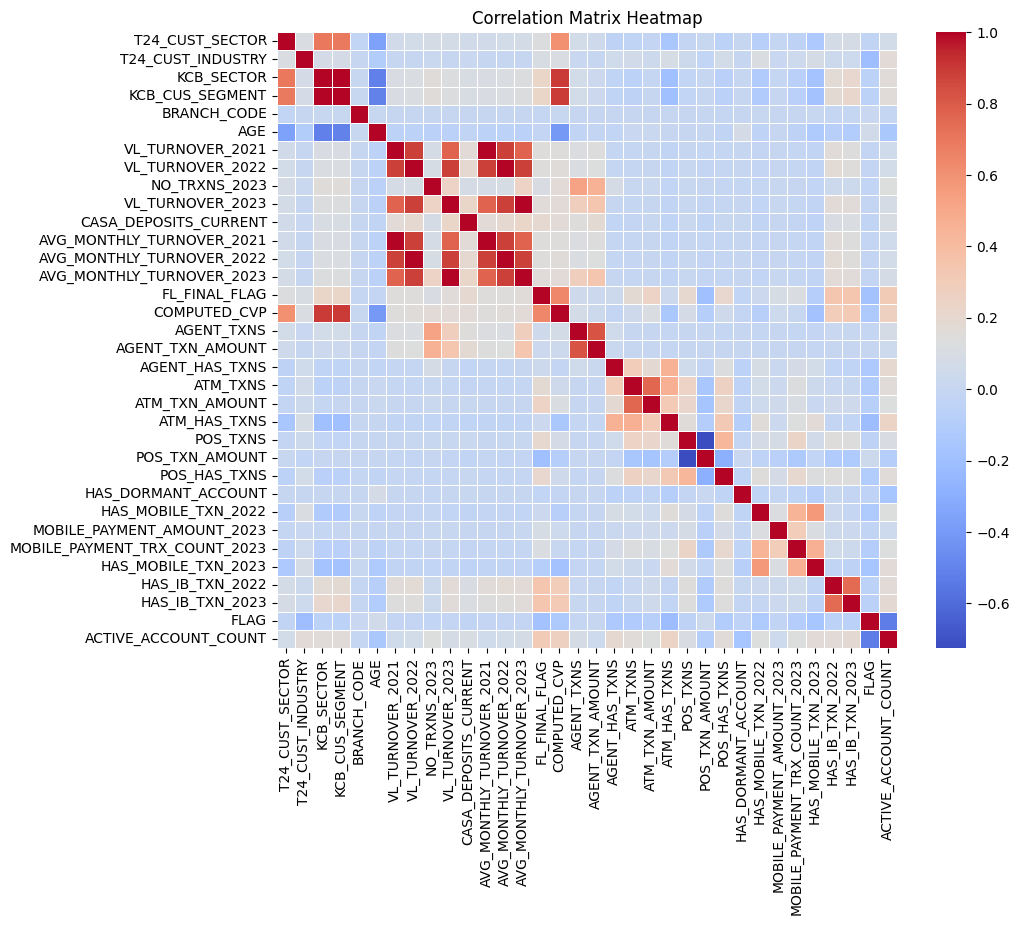

In [ ]:
# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:
# Set a threshold for high correlation (e.g., 0.8)
threshold = 0.8

# Find the pairs of features that are highly correlated
high_corr_var = np.where(corr_matrix > threshold)

# Get the list of column pairs with high correlation (excluding the diagonal)
high_corr_pairs = [(corr_matrix.columns[x], corr_matrix.columns[y])
                   for x, y in zip(*high_corr_var) if x != y and x < y]

# Print the high correlation pairs
print("Highly correlated pairs:")
high_corr_pairs


Highly correlated pairs:


[('KCB_SECTOR', 'KCB_CUS_SEGMENT'),
 ('KCB_SECTOR', 'COMPUTED_CVP'),
 ('KCB_CUS_SEGMENT', 'COMPUTED_CVP'),
 ('VL_TURNOVER_2021', 'VL_TURNOVER_2022'),
 ('VL_TURNOVER_2021', 'AVG_MONTHLY_TURNOVER_2021'),
 ('VL_TURNOVER_2021', 'AVG_MONTHLY_TURNOVER_2022'),
 ('VL_TURNOVER_2022', 'VL_TURNOVER_2023'),
 ('VL_TURNOVER_2022', 'AVG_MONTHLY_TURNOVER_2021'),
 ('VL_TURNOVER_2022', 'AVG_MONTHLY_TURNOVER_2022'),
 ('VL_TURNOVER_2022', 'AVG_MONTHLY_TURNOVER_2023'),
 ('VL_TURNOVER_2023', 'AVG_MONTHLY_TURNOVER_2022'),
 ('VL_TURNOVER_2023', 'AVG_MONTHLY_TURNOVER_2023'),
 ('AVG_MONTHLY_TURNOVER_2021', 'AVG_MONTHLY_TURNOVER_2022'),
 ('AVG_MONTHLY_TURNOVER_2022', 'AVG_MONTHLY_TURNOVER_2023'),
 ('AGENT_TXNS', 'AGENT_TXN_AMOUNT')]

In [ ]:
# Drop specified columns based on their correlation
df = df.drop(columns=['KCB_CUS_SEGMENT', 'COMPUTED_CVP', 'AGENT_TXNS'])

# Create the new ratio columns, ensuring that division by zero results in 0
# Ratio of 'VL_TURNOVER_2021' to 'VL_TURNOVER_2022'
df['RATIO_TURNOVER_2021_2022'] = df['VL_TURNOVER_2021'] / df['VL_TURNOVER_2022'].replace({0: np.nan})
df['RATIO_TURNOVER_2021_2022'] = df['RATIO_TURNOVER_2021_2022'].fillna(0)

# Ratio of 'VL_TURNOVER_2022' to 'VL_TURNOVER_2023'
df['RATIO_TURNOVER_2022_2023'] = df['VL_TURNOVER_2022'] / df['VL_TURNOVER_2023'].replace({0: np.nan})
df['RATIO_TURNOVER_2022_2023'] = df['RATIO_TURNOVER_2022_2023'].fillna(0)

# Ratio of 'AVG_MONTHLY_TURNOVER_2021' to 'AVG_MONTHLY_TURNOVER_2022'
df['RATIO_AVG_TURNOVER_2021_2022'] = df['AVG_MONTHLY_TURNOVER_2021'] / df['AVG_MONTHLY_TURNOVER_2022'].replace({0: np.nan})
df['RATIO_AVG_TURNOVER_2021_2022'] = df['RATIO_AVG_TURNOVER_2021_2022'].fillna(0)

# Ratio of 'AVG_MONTHLY_TURNOVER_2022' to 'AVG_MONTHLY_TURNOVER_2023'
df['RATIO_AVG_TURNOVER_2022_2023'] = df['AVG_MONTHLY_TURNOVER_2022'] / df['AVG_MONTHLY_TURNOVER_2023'].replace({0: np.nan})
df['RATIO_AVG_TURNOVER_2022_2023'] = df['RATIO_AVG_TURNOVER_2022_2023'].fillna(0)

# Drop the original columns used in ratios
df = df.drop(columns=['VL_TURNOVER_2021', 'VL_TURNOVER_2022', 'VL_TURNOVER_2023',
                      'AVG_MONTHLY_TURNOVER_2021', 'AVG_MONTHLY_TURNOVER_2022', 'AVG_MONTHLY_TURNOVER_2023'])

# Display the updated DataFrame to verify the changes
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 33547 entries, 0 to 33786
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   T24_CUST_SECTOR                  33547 non-null  int64         
 1   T24_CUST_INDUSTRY                33547 non-null  int64         
 2   KCB_SECTOR                       33547 non-null  int64         
 3   BRANCH_CODE                      33547 non-null  int64         
 4   AGE                              33547 non-null  float64       
 5   HAS_ACTIVE_CONVENTIONAL_ACCOUNT  33547 non-null  float64       
 6   HAS_TRANSACTIONAL_ACCOUNT        33547 non-null  float64       
 7   VL_TURNOVER_2021_MAX_DATE        33547 non-null  datetime64[ns]
 8   VL_TURNOVER_2022_MAX_DATE        33547 non-null  datetime64[ns]
 9   NO_TRXNS_2023                    33547 non-null  float64       
 10  VL_TURNOVER_2023_MAX_DATE        33547 non-null  datetime64[ns]

## Calculating VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Exclude non-numeric columns for VIF calculation
numeric_df = df.select_dtypes(include=[int, float])

# Calculate VIF for each numeric column
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

# Display the VIF values
print(vif_data)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                            Feature          VIF
0                   T24_CUST_SECTOR     1.919271
1                 T24_CUST_INDUSTRY     1.085760
2                        KCB_SECTOR  2585.687753
3                       BRANCH_CODE     1.002113
4                               AGE     1.512268
5   HAS_ACTIVE_CONVENTIONAL_ACCOUNT     4.684744
6         HAS_TRANSACTIONAL_ACCOUNT     1.411672
7                     NO_TRXNS_2023     1.343028
8             CASA_DEPOSITS_CURRENT     1.098252
9               FL_TURNOVER_REMARKS     2.571803
10                    FL_FINAL_FLAG     3.075887
11                COMPUTED_CVP_DESC     1.926976
12                 AGENT_TXN_AMOUNT     1.310370
13                   AGENT_HAS_TXNS     1.317586
14                         ATM_TXNS     2.867486
15                   ATM_TXN_AMOUNT     2.502417
16                     ATM_HAS_TXNS     1.807859
17                         POS_TXNS     2.513291
18                   POS_TXN_AMOUNT     2.157465
19                  

In [ ]:
# Final droop before model training

final_drop = ['VL_TURNOVER_2021_MAX_DATE', 'VL_TURNOVER_2022_MAX_DATE', 'VL_TURNOVER_2023_MAX_DATE','OLDEST_ACCOUNT']
df = df.drop(columns=final_drop)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33547 entries, 0 to 33786
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   T24_CUST_SECTOR                  33547 non-null  int64  
 1   T24_CUST_INDUSTRY                33547 non-null  int64  
 2   KCB_SECTOR                       33547 non-null  int64  
 3   BRANCH_CODE                      33547 non-null  int64  
 4   AGE                              33547 non-null  float64
 5   HAS_ACTIVE_CONVENTIONAL_ACCOUNT  33547 non-null  float64
 6   HAS_TRANSACTIONAL_ACCOUNT        33547 non-null  float64
 7   NO_TRXNS_2023                    33547 non-null  float64
 8   CASA_DEPOSITS_CURRENT            33547 non-null  float64
 9   FL_TURNOVER_REMARKS              33547 non-null  int64  
 10  FL_FINAL_FLAG                    33547 non-null  int64  
 11  COMPUTED_CVP_DESC                33547 non-null  int64  
 12  AGENT_TXN_AMOUNT       

# Splitting train and test data


In [ ]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
X = df.drop(columns=['FLAG'])  # Drop the target column from features
y = df['FLAG']                 # Target column

# Split data into training and testing sets (80-20 split is common)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes to confirm the split
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (26837, 35)
Testing set shape: (6710, 35)


# Decision Tree Classifier

## Version 1

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model with specific parameters (e.g., max depth to prevent overfitting)
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9535022354694486
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      6011
           1       0.80      0.73      0.77       699

    accuracy                           0.95      6710
   macro avg       0.89      0.86      0.87      6710
weighted avg       0.95      0.95      0.95      6710

Confusion Matrix:
 [[5886  125]
 [ 187  512]]


## Version 2

In [ ]:
# Initialize the model with specific parameters
clf_v2 = DecisionTreeClassifier(criterion = 'gini',random_state=42,max_depth=6,min_samples_leaf=8)

# Fit the model on the training data
clf_v2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf_v2.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9555886736214605
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      6011
           1       0.82      0.73      0.77       699

    accuracy                           0.96      6710
   macro avg       0.90      0.86      0.87      6710
weighted avg       0.95      0.96      0.95      6710

Confusion Matrix:
 [[5900  111]
 [ 187  512]]


## Handling the class imbalance

In [ ]:
# Check for class imbalance
print(df['FLAG'].value_counts())

print('Percentage Non-churners and Churners')
print(df['FLAG'].value_counts(normalize=True) * 100)

# sns.countplot(x='FLAG', data=df)
# plt.show()

FLAG
0    29984
1     3563
Name: count, dtype: int64
Percentage Non-churners and Churners
FLAG
0    89.37908
1    10.62092
Name: proportion, dtype: float64


In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

In [ ]:
smote_enn = SMOTEENN(random_state=42)

# Fit and transform the training data
X_res, y_res = smote_enn.fit_resample(X_train, y_train)

# Check the new class distribution after resampling
print("Original class distribution (y_train):")
print(y_train.value_counts())

print("\nResampled class distribution (y_res):")
print(y_res.value_counts())


Original class distribution (y_train):
FLAG
0    23973
1     2864
Name: count, dtype: int64

Resampled class distribution (y_res):
FLAG
1    19465
0    17489
Name: count, dtype: int64


## Version 2 on the resampled training data

In [ ]:
# Fit the model on the resampled training data
clf_v2.fit(X_res, y_res)

# Make predictions on the test data
y_pred = clf_v2.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9380029806259315
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      6011
           1       0.65      0.87      0.74       699

    accuracy                           0.94      6710
   macro avg       0.82      0.91      0.85      6710
weighted avg       0.95      0.94      0.94      6710

Confusion Matrix:
 [[5689  322]
 [  94  605]]


# Random Forest Classifier

## Version 1 (Best?)

> Upon evaluation turns out to be the best performing model



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict using the trained model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.9611028315946348
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      6011
           1       0.85      0.76      0.80       699

    accuracy                           0.96      6710
   macro avg       0.91      0.87      0.89      6710
weighted avg       0.96      0.96      0.96      6710

Confusion Matrix:
 [[5921   90]
 [ 171  528]]


## Version 2

In [ ]:
# Initialize & Train the model anew
rf_model_v2 = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42,max_depth=6, min_samples_leaf=8)
rf_model_v2.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=42)

In [ ]:
# Predict using the trained model
y_pred_rf2 = rf_model_v2.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf2))
print("Classification Report:\n", classification_report(y_test, y_pred_rf2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf2))


Accuracy: 0.9561847988077496
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      6011
           1       0.88      0.67      0.76       699

    accuracy                           0.96      6710
   macro avg       0.92      0.83      0.87      6710
weighted avg       0.95      0.96      0.95      6710

Confusion Matrix:
 [[5945   66]
 [ 228  471]]


# Performing PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Apply PCA
# Set n_components to retain 90% of variance or choose a specific number of components
pca = PCA(n_components=0.9)  # Retain 90% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 3: Train a Random Forest Model
rf_model_pca = RandomForestClassifier(random_state=42)
rf_model_pca.fit(X_train_pca, y_train)

# Step 4: Make Predictions and Score the Model
y_pred_pca = rf_model_pca.predict(X_test_pca)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print("Classification Report:\n", classification_report(y_test, y_pred_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pca))


Accuracy: 0.9491803278688524
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      6011
           1       0.78      0.72      0.75       699

    accuracy                           0.95      6710
   macro avg       0.87      0.85      0.86      6710
weighted avg       0.95      0.95      0.95      6710

Confusion Matrix:
 [[5869  142]
 [ 199  500]]


# Pickling the model

In [ ]:
import pickle

# Pickling the best performing model: rf_model
with open('/content/drive/MyDrive/DS_DA KCB/Churn Analysis/Prediction Model/model/churn_prediction_model.pkl', 'wb') as f:
  pickle.dump(rf_model, f)

# Analysis of the results

## Random Forest Classifier Model (version 1 and 2)
Model 1: `rf_model = RandomForestClassifier(random_state=42)`

Model 2: `rf_model_v2 = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42,max_depth=6, min_samples_leaf=8)`


The key performance metrics in detail:
1. **Accuracy**
  * Model 1: 96.11%
  * Model 2: 95.62%

Both models have very similar overall accuracy, with Model 1 slightly outperforming Model 2 in terms of this metric. However, accuracy alone may not tell the whole story, especially with an imbalanced dataset where the class distribution might affect other metrics.

2. **Precision, Recall, and F1-Score**
These metrics are essential for understanding how well each model performs on each class, especially the minority class (churned customers, labeled as 1 here).

For Class 0 (Non-Churned Customers):
  * Model 1: Precision = 0.97, Recall = 0.99, F1-Score = 0.98
  * Model 2: Precision = 0.96, Recall = 0.99, F1-Score = 0.98

Both models perform almost identically in detecting non-churned customers (the majority class), with high precision, recall, and F1-scores.

For Class 1 (Churned Customers):
  * Model 1: Precision = 0.85, Recall = 0.76, F1-Score = 0.80
  * Model 2: Precision = 0.88, Recall = 0.67, F1-Score = 0.76

Here, Model 1 has a better balance between recall and precision for the minority class, giving it a higher F1-score (0.80) than Model 2 (0.76). While Model 2 has higher precision (0.88), it sacrifices recall, capturing fewer actual churned customers.

3. **Confusion Matrix Analysis**
The confusion matrix shows:
  * Model 1: Correctly classifies 528 churned customers and misclassifies 171 of them.
  * Model 2: Correctly classifies 471 churned customers and misclassifies 228 of them.

Model 1 has a lower false-negative rate for churned customers, meaning it identifies more churn cases correctly than Model 2, which is generally favorable in a churn-prediction context where recall is often crucial.

**Summary**
* Model 1 has a slight edge in accuracy, a better balance between precision and recall for the minority class (churned customers), and a higher F1-score for class 1. It also has fewer false negatives, which is essential for identifying potential churn accurately.
* Model 2 sacrifices recall for slightly higher precision, which could be useful in applications prioritizing fewer false positives but may miss a greater number of churned customers.

Given these factors, Model 1 generally performs better, especially if you prioritize identifying as many churned customers as possible.


## Random Forest Classifier vs Random Forest Classifier after PCA
A comparison of the Random Forest model after PCA with Model 1:

1. **Accuracy**
  * Model 1: 96.11%
  * PCA Model: 94.92%

Model 1 achieves slightly higher accuracy than the PCA-transformed model, suggesting that Model 1 is better at correctly classifying overall cases.

2. **Precision, Recall, and F1-Score**
These metrics provide insights into each model's performance on the minority class (churned customers, labeled as 1) and the majority class (non-churned customers, labeled as 0).

For Class 0 (Non-Churned Customers):
  * Model 1: Precision = 0.97, Recall = 0.99, F1-Score = 0.98
  * PCA Model: Precision = 0.97, Recall = 0.98, F1-Score = 0.97

Both models perform similarly on the non-churned class, with nearly identical precision, recall, and F1-scores.

For Class 1 (Churned Customers):
  * Model 1: Precision = 0.85, Recall = 0.76, F1-Score = 0.80
  * PCA Model: Precision = 0.78, Recall = 0.72, F1-Score = 0.75

Model 1 performs better in identifying churned customers, with higher precision, recall, and F1-scores for class 1. This is particularly important in churn prediction where we want to minimize false negatives.

3. **Confusion Matrix Analysis**
  * Model 1: Correctly classifies 528 churned customers, misclassifying 171 of them.
  * PCA Model: Correctly classifies 500 churned customers, misclassifying 199 of them.
  
Model 1 has a lower false-negative rate for churned customers, meaning it correctly identifies more of them compared to the PCA model.

**Interpretation of PCA Model Performance**
The PCA-transformed model achieves decent accuracy (94.92%) and maintains a good balance between precision and recall, but it does not perform as well as Model 1, particularly for class 1 (churned customers).

**Conclusion**
Model 1 outperforms the PCA-transformed model in terms of accuracy, recall, and F1-score, especially for identifying churned customers (class 1).
Model 1 maximizes accuracy in predicting churn.



